In [1]:
import pandas as pd
import os

In [2]:
# in this task we should join data from different places on hard disk to one dataset________________________


# our current working directory
os.getcwd()

'/home/alberdinamariya'

In [3]:
# let's get path for os library for our data

In [4]:
os.listdir('/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data')

['2020-12-06',
 '2020-12-05',
 '2020-12-04',
 '2020-12-07',
 '2020-12-03',
 '2020-12-09',
 '2020-12-08']

In [5]:
# let's create variable with path to our working catalogue with data, that we should to add to one dataframe
path = '/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data'

In [6]:
os.walk(path)

<generator object walk at 0x7fb519532dd0>

In [7]:
# for you to remember it better - generator's main feature - they lets us to econom operative memory,
# because generetors does not store data, but yields one piece of info from reading data, and forgets it right now.

In [8]:
list(os.walk(path))

[('/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data',
  ['2020-12-06',
   '2020-12-05',
   '2020-12-04',
   '2020-12-07',
   '2020-12-03',
   '2020-12-09',
   '2020-12-08'],
  []),
 ('/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data/2020-12-06',
  ['Vasiliy_Fedorov'],
  []),
 ('/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data/2020-12-06/Vasiliy_Fedorov',
  [],
  ['data.csv']),
 ('/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data/2020-12-05',
  ['Rostislav_Smirnov',
   'Kirill_Smirnov',
   'Petr_Ivanov',
   'Alexey_Fedorov',
   'Alexey_Petrov',
   'Petr_Smirnov'],
  []),
 ('/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data/2020-12-05/Rostislav_Smirnov',
  [],
  ['data.csv']),
 ('/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data/2020-12-05/Kirill_Smirnov',
  [],
  ['data.csv']),
 ('/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data/2020-12-05/Petr_Ivanov',
  [],
  ['data.csv']),
 ('

In [9]:
# let's use python's property to unpack iterable data to variables
# then get what files contains
path = '/home/alberdinamariya/Desktop/data_sciense/ds4/Tasks/проект/data'
final_df = pd.DataFrame()
for path, directories, files in os.walk(path):
    for file in files:
        # create path for each iteration with help of f-string
        f'{path}/{file}'
        # here we can read each csv files from directory
        df = pd.read_csv(f'{path}/{file}')
        # we need to add to dataframe info about names and dates that we can get from data directory
        a = path.split('/')
        name = a[-1]
        date = a[-2]
        df['name'] = name
        df['date'] = date
        final_df = pd.concat((final_df, df))
        

In [10]:
final_df.columns

Index(['Unnamed: 0', 'product_id', 'quantity', 'name', 'date'], dtype='object')

In [11]:
final_df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
# we should place indexies in right order after concatenation of several dataframes
final_df.reset_index(drop=True, inplace=True)

In [13]:
final_df

,product_id,quantity,name,date
0,56,4,Vasiliy_Fedorov,2020-12-06
1,97,3,Vasiliy_Fedorov,2020-12-06
2,79,3,Vasiliy_Fedorov,2020-12-06
3,29,5,Vasiliy_Fedorov,2020-12-06
4,66,2,Rostislav_Smirnov,2020-12-05
...,...,...,...,...
156,73,5,Alexey_Fedorov,2020-12-08
157,34,1,Alexey_Fedorov,2020-12-08
158,71,1,Alexey_Fedorov,2020-12-08
159,18,2,Alexey_Fedorov,2020-12-08


In [14]:
# Выясните, какой пользователь купил больше всего товаров.
# Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.


In [15]:
final_df.groupby('name').agg({'quantity' : 'sum'}).sort_values('quantity', ascending=False)

,quantity
name,
Alexey_Smirnov,52
Petr_Smirnov,52
Anton_Smirnov,45
Petr_Fedorov,34
Kirill_Fedorov,28
Rostislav_Petrov,28
Vasiliy_Ivanov,27
Alexey_Fedorov,24
Anton_Ivanov,23


In [16]:
# Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. 
# Сколько было продано единиц товара с product_id==56?

quantity_sold = final_df.groupby('product_id', as_index=False).agg({'quantity' : 'sum'}).sort_values('quantity', ascending=False)
quantity_sold

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
...,...,...
52,75,2
39,52,1
56,80,1
43,57,1


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

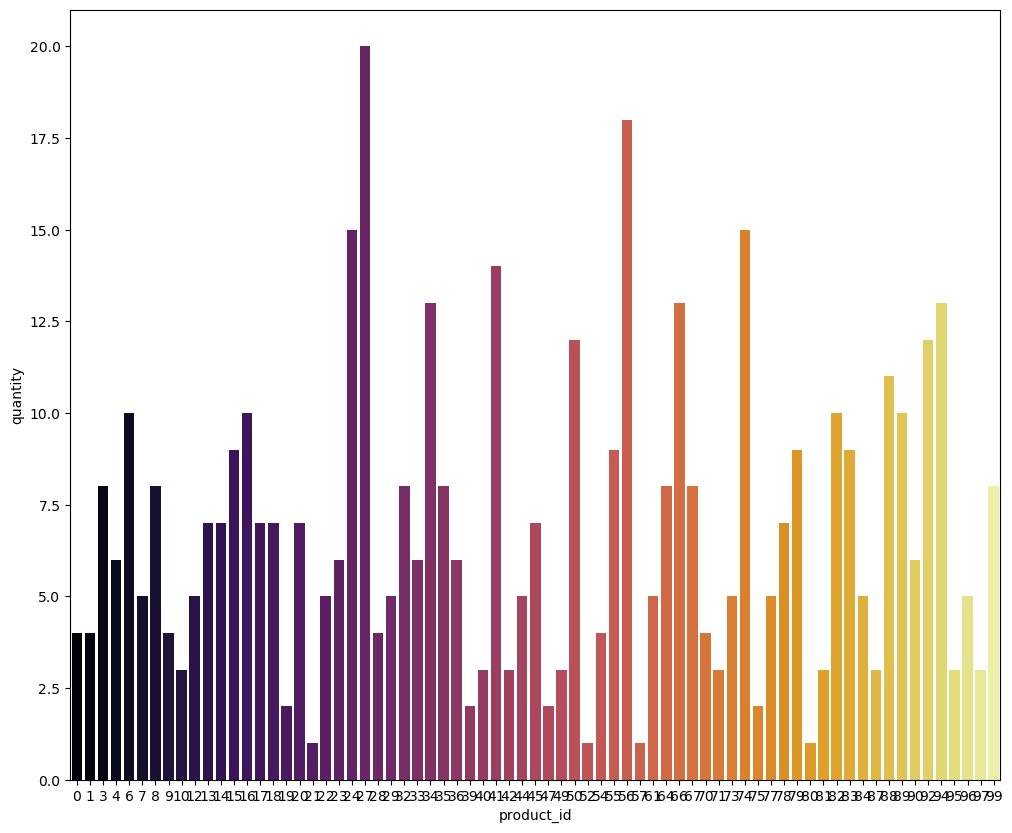

In [26]:
plt.figure(figsize=(12,10))
sns.barplot(data=quantity_sold, x='product_id', y='quantity', palette='inferno')

In [20]:
# Визуализируйте продажи по дням.
final_df['date'] = pd.to_datetime(final_df.date)

In [21]:
final_df['day'] = final_df.date.dt.day

In [22]:
final_df_days = final_df.groupby('day', as_index=False).agg({'quantity' : 'sum'})
final_df_days

,day,quantity
0,3,60
1,4,113
2,5,61
3,6,15
4,7,94
5,8,68
6,9,69


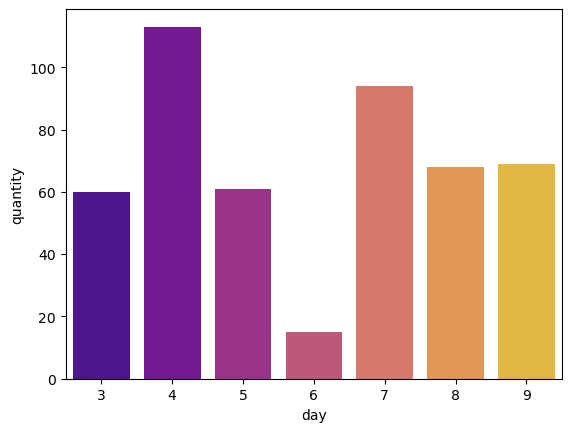

In [28]:
sns.barplot(data=final_df_days, x='day', y='quantity', palette='plasma')

In [24]:
# Cколько пользователей приобрели какой-либо товар повторно (более 1 раза)? 
# Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.
final_df

,product_id,quantity,name,date,day
0,56,4,Vasiliy_Fedorov,2020-12-06,6
1,97,3,Vasiliy_Fedorov,2020-12-06,6
2,79,3,Vasiliy_Fedorov,2020-12-06,6
3,29,5,Vasiliy_Fedorov,2020-12-06,6
4,66,2,Rostislav_Smirnov,2020-12-05,5
...,...,...,...,...,...
156,73,5,Alexey_Fedorov,2020-12-08,8
157,34,1,Alexey_Fedorov,2020-12-08,8
158,71,1,Alexey_Fedorov,2020-12-08,8
159,18,2,Alexey_Fedorov,2020-12-08,8


In [25]:
repeated_purchases = final_df.groupby(['name', 'product_id'], as_index=False)\
                        .aggregate({'day' : 'count'})\
                        .rename(columns={'day' : 'number_of_purchases'})\
                        .query('number_of_purchases != 1')
repeated_purchases

,name,product_id,number_of_purchases
30,Alexey_Smirnov,55,2
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
